In [1]:
%load_ext autoreload
%autoreload 2
# %cd /p/mmcardiac/Jerry/code/CINE-DENSE-Translation
%cd /home/jx8fh/Projects/LaMoD
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from modules.data import check_dict

/sfs/gpfs/tardis/home/jx8fh/Projects/LaMoD


In [2]:
strain_prev_filename = '/scratch/jx8fh/2024-04-24-whole-vol-preds-strain-and-errors.npy'
strain_prev_data = np.load(strain_prev_filename, allow_pickle=True).tolist()
check_dict(strain_prev_data)

MotionDecoder1x1                                             dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
UNetROri                                                     dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
UNetR1x1                                                     dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
StrainNetOri                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
StrainNet                                                    dict_keys(['strain_img_MSE_errors',

In [3]:
len(strain_prev_data['MotionDecoder1x1']['strain_img_L1_errors'])

102

In [4]:
# strain_transUNet_filename = '/p/mmcardiac/Jerry/code/CINE-DENSE-Translation/review/2024-04/2024-04-24-whole-vol-preds/2024-04-24-whole-vol-preds-strain-and-errors.npy'
strain_transUNet_filename = '/scratch/jx8fh/2024-06-22-whole-vol-preds-strain-and-errors-TransUNet.npy'
strain_transUNet_data = np.load(strain_transUNet_filename, allow_pickle=True).tolist()
check_dict(strain_transUNet_data)

TransUNetOri                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
TransUNet1x1                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])


In [5]:
test_GT_data = np.load('/scratch/jx8fh/2024-04-16-test-data.npy', allow_pickle=True).tolist()
check_dict(test_GT_data[0])

patient_id                                                   033                 
DENSE_slice_mat_filename                                     /p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-DENSE-data/033_S01_base_auto.1_ROI.1.mat
DENSE_slice_location                                         76.947609505431     
DENSE_frame_time_stamps                                      (51,)               
DENSE_Lag_displacement_field_X                               (48, 48, 51)        
DENSE_Lag_displacement_field_Y                               (48, 48, 51)        
DENSE_myo_masks                                              (48, 48, 51)        
DENSE_myo_mask_bbox                                          (34, 82, 40, 88)    
DENSE_myo_masks_rescaled                                     (128, 128, 51)      
DENSE_n_frames_all                                           51                  
DENSE_frame_indices_with_myo_contour                         (51,)               
out_of_box_flag        

In [6]:
len(test_GT_data)

102

In [7]:
segment_names = [
    'Inferoseptal',
    'Inferior',
    'Inferolateral',
    'Anterolateral',
    'Anterior',
    'Anteroseptal'
]

In [8]:
import glob
from pathlib import Path
# data_dir = Path('/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/DENSE_strain/')
data_dir = Path('/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/')
# datum_idx = 95
datum_idx = 24
datum_repeat_preds_fname = glob.glob(str(data_dir / f'LaMoD-DENSE-SkipDiffusion-{datum_idx:03d}-*.npy'))[0]
datum_repeat_preds = np.load(datum_repeat_preds_fname, allow_pickle=True).tolist()

# strainmat_GT = test_GT_data[datum_idx]['DENSE_strain_CCs6']
# strainmat_GT_max = np.max(strainmat_GT[~np.isnan(strainmat_GT)])    
# strainmat_GT_min = np.min(strainmat_GT[~np.isnan(strainmat_GT)])

strainmat_MotionDecoder = strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'][datum_idx]['CCs6']

In [9]:
len(datum_repeat_preds)

1

In [10]:
check_dict(datum_repeat_preds[0])

disp_GT                                                      (2, 48, 48, 47)     
disp_pred                                                    (2, 48, 48, 46)     
disp_mask                                                    (48, 48)            
strain_GT                                                    (48, 48, 47)        
strain_pred                                                  (48, 48, 46)        
origin_pred                                                  (2,)                
insertion_pred                                               (2,)                
CCs4_pred                                                    (4, 46)             
CCs6_pred                                                    (6, 46)             
CCs18_pred                                                   (18, 46)            
Seg4_pred                                                    dict_keys(['insertion_shifted', 'BasisNames', 'BasisID', 'SegmentID'])
Seg6_pred                                       

In [11]:
from IPython.display import HTML
from matplotlib import animation
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')

In [32]:
def create_image_gif(image_video, output_path, fps=10, subsample_rate=1):
    """
    Create a GIF from an image video.
    
    :param image_video: numpy array of shape (H, W, T)
    :param output_path: path to save the output GIF
    :param fps: frames per second for the output GIF
    :param subsample_rate: rate at which to subsample the images
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(image_video[::subsample_rate, ::subsample_rate, 0], cmap='gray')
    ax.axis('off')

    def animate(i):
        im.set_data(image_video[::subsample_rate, ::subsample_rate, i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=image_video.shape[2], interval=100, blit=True)
    anim.save(output_path, writer='ffmpeg', fps=fps)
    plt.close(fig)
create_image_gif(
    test_GT_data[datum_idx]['DENSE_myo_masks'],
    f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-mask-GT.gif'
)

In [33]:
def create_displacement_gif(displacement_video, output_path, fps=10, subsample_rate=1, quiver_scale=2):
    """
    Create a GIF from a displacement video.
    
    :param displacement_video: numpy array of shape (2, T, H, W)
    :param output_path: path to save the output GIF
    :param fps: frames per second for the output GIF
    :param subsample_rate: rate at which to subsample the displacement field
    :param quiver_scale: scale for the quiver plot
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('black')
    quiver = ax.quiver(displacement_video[0, 0, ::subsample_rate, ::subsample_rate],
                       displacement_video[1, 0, ::subsample_rate, ::subsample_rate],
                       scale=quiver_scale, units='xy', color='y')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    def animate(i):
        quiver.set_UVC(displacement_video[0, i, ::subsample_rate, ::subsample_rate],
                       displacement_video[1, i, ::subsample_rate, ::subsample_rate])
        return (quiver,)

    anim = animation.FuncAnimation(fig, animate, frames=displacement_video.shape[1], interval=100, blit=True)
    anim.save(output_path, writer='ffmpeg', fps=fps)
    plt.close(fig)
create_displacement_gif(
    np.moveaxis(np.concatenate([test_GT_data[datum_idx]['DENSE_Lag_displacement_field_X'][None], test_GT_data[datum_idx]['DENSE_Lag_displacement_field_Y'][None]], axis=0), -1, 1),
    f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-disp-GT.gif'
)

In [34]:
create_displacement_gif(
    np.moveaxis(datum_repeat_preds[0]['disp_pred'], -1, 1),
    f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-disp-pred.gif'
)

In [35]:
np.concatenate([test_GT_data[datum_idx]['DENSE_Lag_displacement_field_X'][None], test_GT_data[datum_idx]['DENSE_Lag_displacement_field_Y'][None]], axis=0).shape

(2, 48, 48, 47)

In [36]:
def create_combined_gif(image_video, displacement_video, output_path, fps=10, subsample_rate=1, quiver_scale=2):
    """
    Create a GIF with displacement field vectors plotted over images.
    
    :param image_video: numpy array of shape (H, W, T)
    :param displacement_video: numpy array of shape (2, T, H, W)
    :param output_path: path to save the output GIF
    :param fps: frames per second for the output GIF
    :param subsample_rate: rate at which to subsample the images and displacement field
    :param quiver_scale: scale for the quiver plot
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(image_video[::subsample_rate, ::subsample_rate, 0], cmap='gray')
    ax.invert_yaxis()
    quiver = ax.quiver(displacement_video[0, 0, ::subsample_rate, ::subsample_rate],
                       displacement_video[1, 0, ::subsample_rate, ::subsample_rate],
                       scale=quiver_scale, units='xy', color='y')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    def animate(i):
        im.set_data(image_video[::subsample_rate, ::subsample_rate, i])
        quiver.set_UVC(displacement_video[0, i, ::subsample_rate, ::subsample_rate],
                       displacement_video[1, i, ::subsample_rate, ::subsample_rate])
        return (im, quiver)

    anim = animation.FuncAnimation(fig, animate, frames=image_video.shape[2], interval=100, blit=True)
    anim.save(output_path, writer='ffmpeg', fps=fps)
    plt.close(fig)
create_combined_gif(
    test_GT_data[datum_idx]['DENSE_myo_masks'],
    np.moveaxis(np.concatenate([test_GT_data[datum_idx]['DENSE_Lag_displacement_field_X'][None], test_GT_data[datum_idx]['DENSE_Lag_displacement_field_Y'][None]], axis=0), -1, 1),
    f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-mask-disp-GT.gif'
)


---

In [12]:
import copy
def get_disp_mask(disp_X, disp_Y, thres=5e-1):
    norm = np.sqrt(disp_X**2 + disp_Y**2)
    mask = norm > thres
    return mask

def apply_mask_to_displacement(displacement, mask_thres=5e-1):
    """
    Deep copy the input displacement data and make out-of-mask regions NaN.
    
    :param displacement: numpy array of shape (2, T, H, W)
    :return: masked displacement array of the same shape
    """
    masked_displacement = copy.deepcopy(displacement)
    
    # Compute mask for a middle time frame
    middle_frame = displacement.shape[1] // 2
    mask = get_disp_mask(displacement[0, middle_frame], displacement[1, middle_frame], thres=mask_thres)
    
    # Apply mask to all time frames
    mask_4d = np.tile(mask[None, None, :, :], (2, displacement.shape[1], 1, 1))
    masked_displacement[~mask_4d] = np.nan
    
    return masked_displacement

def get_visualization_window(displacement, margin=10):
    """
    Choose the proper visualization window based on the non-NaN region.
    
    :param displacement: numpy array of shape (2, T, H, W)
    :param margin: number of pixels to add as margin around the non-NaN region
    :return: tuple of (x_min, x_max, y_min, y_max) for the visualization window
    """
    # Use a middle time frame to determine the non-NaN region
    middle_frame = displacement.shape[1] // 2
    mask = ~np.isnan(displacement[0, middle_frame])
    
    non_nan_y, non_nan_x = np.where(mask)
    
    x_min, x_max = non_nan_x.min(), non_nan_x.max()
    y_min, y_max = non_nan_y.min(), non_nan_y.max()
    
    # Add margin
    x_min = max(0, x_min - margin)
    x_max = min(displacement.shape[3], x_max + margin)
    y_min = max(0, y_min - margin)
    y_max = min(displacement.shape[2], y_max + margin)
    
    return x_min, x_max, y_min, y_max

In [13]:
def create_image_gif(image_video, output_path, fps=10, subsample_rate=1, x_min=None, x_max=None, y_min=None, y_max=None):
    """
    Create a GIF from an image video.
    
    :param image_video: numpy array of shape (H, W, T)
    :param output_path: path to save the output GIF
    :param fps: frames per second for the output GIF
    :param subsample_rate: rate at which to subsample the images
    :param x_min, x_max, y_min, y_max: visualization window parameters
    """
    fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
    im = ax.imshow(image_video[::subsample_rate, ::subsample_rate, 0], cmap='gray')
    ax.axis('off')
    ax.invert_yaxis()
    
    if x_min is not None and x_max is not None and y_min is not None and y_max is not None:
        ax.set_xlim(x_min // subsample_rate, x_max // subsample_rate)
        ax.set_ylim(y_max // subsample_rate, y_min // subsample_rate)  # Reversed for imshow
    
    def animate(i):
        im.set_data(image_video[::subsample_rate, ::subsample_rate, i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=image_video.shape[2], interval=100, blit=True)
    anim.save(output_path, writer='ffmpeg', fps=fps)
    plt.close(fig)

def create_displacement_gif(displacement_video, output_path, fps=10, subsample_rate=1, quiver_scale=1, x_min=None, x_max=None, y_min=None, y_max=None):
    """
    Create a GIF from a displacement video.
    
    :param displacement_video: numpy array of shape (2, T, H, W)
    :param output_path: path to save the output GIF
    :param fps: frames per second for the output GIF
    :param subsample_rate: rate at which to subsample the displacement field
    :param quiver_scale: scale for the quiver plot
    :param x_min, x_max, y_min, y_max: visualization window parameters
    """
    fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
    ax.set_facecolor('black')
    quiver = ax.quiver(displacement_video[0, 0, ::subsample_rate, ::subsample_rate],
                       displacement_video[1, 0, ::subsample_rate, ::subsample_rate],
                       scale=quiver_scale, units='xy', color='y')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    
    if x_min is not None and x_max is not None and y_min is not None and y_max is not None:
        ax.set_xlim(x_min // subsample_rate, x_max // subsample_rate)
        ax.set_ylim(y_min // subsample_rate, y_max // subsample_rate)

    def animate(i):
        quiver.set_UVC(displacement_video[0, i, ::subsample_rate, ::subsample_rate],
                       displacement_video[1, i, ::subsample_rate, ::subsample_rate])
        return (quiver,)

    anim = animation.FuncAnimation(fig, animate, frames=displacement_video.shape[1], interval=100, blit=True)
    anim.save(output_path, writer='ffmpeg', fps=fps)
    plt.close(fig)

def create_combined_gif(image_video, displacement_video, output_path, fps=10, subsample_rate=1, quiver_scale=1, x_min=None, x_max=None, y_min=None, y_max=None):
    fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
    im = ax.imshow(image_video[::subsample_rate, ::subsample_rate, 0], cmap='gray')
    ax.invert_yaxis()
    quiver = ax.quiver(displacement_video[0, 0, ::subsample_rate, ::subsample_rate],
                       displacement_video[1, 0, ::subsample_rate, ::subsample_rate],
                       scale=quiver_scale, units='xy', color='y')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    
    if x_min is not None and x_max is not None and y_min is not None and y_max is not None:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

    def animate(i):
        im.set_data(image_video[::subsample_rate, ::subsample_rate, i])
        quiver.set_UVC(displacement_video[0, i, ::subsample_rate, ::subsample_rate],
                       displacement_video[1, i, ::subsample_rate, ::subsample_rate])
        return (im, quiver)

    anim = animation.FuncAnimation(fig, animate, frames=image_video.shape[2], interval=100, blit=True)
    anim.save(output_path, writer='ffmpeg', fps=fps)
    plt.close(fig)

In [14]:
def create_gif(image_video=None, displacement_video=None, output_path='output.gif', fps=10, subsample_rate=1, quiver_scale=1, mask_thres=5e-1):
    """
    Create a GIF based on the provided inputs.
    
    :param image_video: numpy array of shape (H, W, T) or None
    :param displacement_video: numpy array of shape (2, T, H, W) or None
    :param output_path: path to save the output GIF
    :param fps: frames per second for the output GIF
    :param subsample_rate: rate at which to subsample the images and displacement field
    :param quiver_scale: scale for the quiver plot
    """
    if displacement_video is not None:
        displacement_video = apply_mask_to_displacement(displacement_video, mask_thres=mask_thres)
        x_min, x_max, y_min, y_max = get_visualization_window(displacement_video)
    else:
        x_min, x_max, y_min, y_max = None, None, None, None
    
    if image_video is not None and displacement_video is not None:
        create_combined_gif(image_video, displacement_video, output_path, fps, subsample_rate, quiver_scale, x_min, x_max, y_min, y_max)
    elif image_video is not None:
        create_image_gif(image_video, output_path, fps, subsample_rate, x_min, x_max, y_min, y_max)
    elif displacement_video is not None:
        create_displacement_gif(displacement_video, output_path, fps, subsample_rate, quiver_scale, x_min, x_max, y_min, y_max)
    else:
        raise ValueError("At least one of image_video or displacement_video must be provided.")

In [15]:
datum_idx

24

In [16]:
# create_gif(
#     image_video=None,
#     displacement_video=np.moveaxis(np.concatenate([test_GT_data[datum_idx]['DENSE_Lag_displacement_field_X'][None], test_GT_data[datum_idx]['DENSE_Lag_displacement_field_Y'][None]], axis=0), -1, 1),
#     output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-disp-GT.gif'
# )
# create_gif(
#     image_video=None,
#     displacement_video=np.moveaxis(datum_repeat_preds[0]['disp_pred'], -1, 1),
#     output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-disp-pred.gif',
#     mask_thres=1e-1
# )

In [17]:
import numpy as np
def extract_radial_tangent_components(displacement_field, center=None):
    """
    Extracts radial and tangent components of a displacement field.

    Args:
    - displacement_field: A numpy array of shape (2, H, W) representing the displacement vectors.
    - center: A tuple (x, y) specifying the center point. Defaults to the center of the displacement field.

    Returns:
    - radial_component: The radial component of the displacement field.
    - tangent_component: The tangent component of the displacement field.
    """
    _, H, W = displacement_field.shape
    if center is None:
        center = (W // 2, H // 2)
    
    # Adjust coordinate grid generation to ensure shape compatibility
    X, Y = np.meshgrid(np.arange(W), np.arange(H))
    
    # Calculate the direction vectors from the center to each point
    direction_vectors = np.stack([(X - center[0]), (Y - center[1])], axis=0)
    
    # Normalize direction vectors to get unit vectors
    norms = np.sqrt(direction_vectors[0]**2 + direction_vectors[1]**2)
    norms[norms == 0] = 1  # To avoid division by zero
    unit_direction_vectors = direction_vectors / norms
    
    # Calculate radial components
    displacement_magnitudes = np.sum(displacement_field * unit_direction_vectors, axis=0)
    radial_component = unit_direction_vectors * displacement_magnitudes
    
    # Calculate tangent components
    tangent_component = displacement_field - radial_component
    
    return radial_component, tangent_component

In [24]:
# datum_idx = 95; disp_pred_scale = 0.5; disp_GT_scale = 1
datum_idx = 24; disp_pred_scale = 1; disp_GT_scale = 1

In [25]:
datum_disp_GT = np.moveaxis(np.concatenate([test_GT_data[datum_idx]['DENSE_Lag_displacement_field_X'][None], test_GT_data[datum_idx]['DENSE_Lag_displacement_field_Y'][None]], axis=0), -1, 1)[:, :-1]
datum_disp_GT_rad = np.zeros_like(datum_disp_GT)
datum_disp_GT_tan = np.zeros_like(datum_disp_GT)

for frame_idx in range(datum_disp_GT.shape[1]):
    disp_frame = datum_disp_GT[:, frame_idx]
    disp_frame_rad, disp_frame_tan = extract_radial_tangent_components(disp_frame)
    datum_disp_GT_rad[:, frame_idx] = disp_frame_rad
    datum_disp_GT_tan[:, frame_idx] = disp_frame_tan

In [26]:
create_gif(
    image_video=None,
    displacement_video=datum_disp_GT,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-disp-GT.gif',
    mask_thres=1e-3,
    quiver_scale=disp_GT_scale
)

create_gif(
    image_video=None,
    displacement_video=datum_disp_GT_rad,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-disp-GT-rad.gif',
    mask_thres=1e-3,
    quiver_scale=disp_GT_scale
)

create_gif(
    image_video=None,
    displacement_video=datum_disp_GT_tan,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-disp-GT-tan.gif',
    mask_thres=1e-3,
    quiver_scale=disp_GT_scale
)


In [27]:
from modules.data import loadmat
datum_mat_fname = Path(test_GT_data[datum_idx]['DENSE_slice_mat_filename'])
# print(datum_mat_fname.name)
datum_mat = loadmat(Path('/scratch/jx8fh/2025-01-24-Yu-DENSE-data') / Path(datum_mat_fname).name)
datum_mag = datum_mat['ImageInfo']['Mag'][...,:-1]
datum_mag_bbox = test_GT_data[datum_idx]['DENSE_myo_mask_bbox']
datum_mag_cropped = datum_mat['ImageInfo']['Mag'][datum_mag_bbox[0]:datum_mag_bbox[1], datum_mag_bbox[2]:datum_mag_bbox[3], :-1]

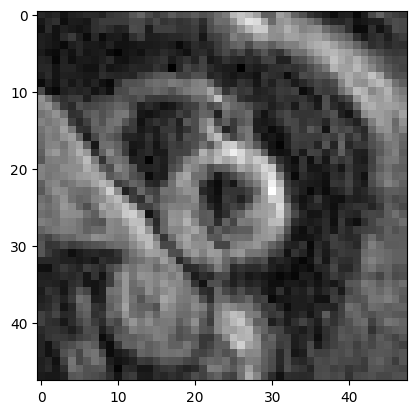

In [28]:
plt.imshow(datum_mag_cropped[...,10], cmap='gray')

In [29]:
# create_gif(
#     image_video=datum_mag_cropped,
#     displacement_video=datum_disp_GT,
#     output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-mag-disp-GT.gif',
#     mask_thres=1e-3,
#     quiver_scale=disp_GT_scale
# )
create_gif(
    image_video=datum_mag_cropped,
    displacement_video=datum_disp_GT_rad,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-mag-disp-GT-rad.gif',
    mask_thres=1e-3,
    quiver_scale=disp_GT_scale
)

create_gif(
    image_video=datum_mag_cropped,
    displacement_video=datum_disp_GT_tan,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-mag-disp-GT-tan.gif',
    mask_thres=1e-3,
    quiver_scale=disp_GT_scale
)

In [30]:
datum_repeat_preds_fname = glob.glob(str(data_dir / f'LaMoD-DENSE-SkipDiffusion-{datum_idx:03d}-*.npy'))[0]
datum_repeat_preds = np.load(datum_repeat_preds_fname, allow_pickle=True).tolist()
datum_disp_pred = np.moveaxis(datum_repeat_preds[0]['disp_pred'], -1, 1)
datum_disp_pred_rad = np.zeros_like(datum_disp_pred)
datum_disp_pred_tan = np.zeros_like(datum_disp_pred)

for frame_idx in range(datum_disp_pred.shape[1]):
    disp_frame = datum_disp_pred[:, frame_idx]
    disp_frame_rad, disp_frame_tan = extract_radial_tangent_components(disp_frame)
    datum_disp_pred_rad[:, frame_idx] = disp_frame_rad
    datum_disp_pred_tan[:, frame_idx] = disp_frame_tan

In [31]:
create_gif(
    image_video=None,
    displacement_video=datum_disp_pred,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-disp-pred.gif',
    mask_thres=1e-3,
    quiver_scale=disp_pred_scale
)

create_gif(
    image_video=None,
    displacement_video=datum_disp_pred_rad,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-disp-pred-rad.gif',
    mask_thres=1e-3,
    quiver_scale=disp_pred_scale
)

create_gif(
    image_video=None,
    displacement_video=datum_disp_pred_tan,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-disp-pred-tan.gif',
    mask_thres=1e-3,
    quiver_scale=disp_pred_scale
)


In [32]:
create_gif(
    image_video=datum_mag_cropped,
    displacement_video=datum_disp_pred,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-mag-disp-pred.gif',
    mask_thres=1e-3,
    quiver_scale=disp_pred_scale
)

create_gif(
    image_video=datum_mag_cropped,
    displacement_video=datum_disp_pred_rad,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-mag-disp-pred-rad.gif',
    mask_thres=1e-3,
    quiver_scale=disp_pred_scale
)

create_gif(
    image_video=datum_mag_cropped,
    displacement_video=datum_disp_pred_tan,
    output_path=f'/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-24-make-rotation-case-video/case{datum_idx:03d}-mag-disp-pred-tan.gif',
    mask_thres=1e-3,
    quiver_scale=disp_pred_scale
)
